<h1 align="center">IBM DATASCIENCE CAPSTONE</h1>

<h4 align="center">"IBM Data Science Capstone Project for Coursera platform"</h4>

<h2 align="center">Opening of a business in the city of Toulouse</h2>

&nbsp;

&nbsp;

<h4 align="center">AUTHOR : Benoit Mateu</h4>

<h4 align="center">April 2020</h4>

&nbsp;

&nbsp;

<img src="https://cdn.radiofrance.fr/s3/cruiser-production/2017/01/d41adcce-3942-4d41-8afc-80ef16183f55/870x489_16128085_1350071735056222_718893364_n.webp" alt="" />

&nbsp;

In [411]:
import requests 
import pandas as pd 
import numpy as np 
import random 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
from bs4 import BeautifulSoup
from sklearn import linear_model
import folium 
print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda

In [3]:
CLIENT_ID = 'VPIEOPDNXOS3SSPEJQWHWAYKX4LH1TDVBVVS544YTSU3A12B'
CLIENT_SECRET = 'RMUXDVT5QVADDSKZPMVFPTXEBYICXP4RKXK3KNYNQKGOQRBI'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VPIEOPDNXOS3SSPEJQWHWAYKX4LH1TDVBVVS544YTSU3A12B
CLIENT_SECRET:RMUXDVT5QVADDSKZPMVFPTXEBYICXP4RKXK3KNYNQKGOQRBI


In [4]:
address = 'Toulouse, FR'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6044622 1.4442469


In [132]:
search_query = 'Toulouse'
radius = 20000
print(search_query + ' .... OK!')

Toulouse .... OK!


In [133]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VPIEOPDNXOS3SSPEJQWHWAYKX4LH1TDVBVVS544YTSU3A12B&client_secret=RMUXDVT5QVADDSKZPMVFPTXEBYICXP4RKXK3KNYNQKGOQRBI&ll=43.6044622,1.4442469&v=20180604&query=Toulouse&radius=20000&limit=30'

In [134]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e933b940cc1fd001bcfc851'},
 'response': {'venues': [{'id': '50229011e4b052a44798ef0a',
    'name': 'Toulouse',
    'location': {'lat': 43.60438617150067,
     'lng': 1.443629264831543,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.60438617150067,
       'lng': 1.443629264831543}],
     'distance': 50,
     'postalCode': '31000',
     'cc': 'FR',
     'state': 'Midi-Pyrénées',
     'country': 'France',
     'formattedAddress': ['31000', 'France']},
    'categories': [{'id': '50aa9e094b90af0d42d5de0d',
      'name': 'City',
      'pluralName': 'Cities',
      'shortName': 'City',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1586707450',
    'hasPerk': False},
   {'id': '4bda9c29c79cc928fd3f7fe9',
    'name': 'Office de Tourisme de Toulouse',
    'location': {'address': 'Square Charles de Gaulle',
     'lat': 43.60

In [378]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\redge\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.state,location.country,location.formattedAddress,location.address,location.city,venuePage.id,location.crossStreet
0,50229011e4b052a44798ef0a,Toulouse,"[{'id': '50aa9e094b90af0d42d5de0d', 'name': 'C...",v-1586707450,False,43.604386,1.443629,"[{'label': 'display', 'lat': 43.60438617150067...",50,31000,FR,Midi-Pyrénées,France,"[31000, France]",NaN,NaN,NaN,NaN
1,4bda9c29c79cc928fd3f7fe9,Office de Tourisme de Toulouse,"[{'id': '4f4530164b9074f6e4fb00ff', 'name': 'T...",v-1586707450,False,43.604515,1.444769,"[{'label': 'display', 'lat': 43.60451541222345...",42,31080,FR,Midi-Pyrénées,France,"[Square Charles de Gaulle, 31080 Toulouse, Fra...",Square Charles de Gaulle,Toulouse,NaN,NaN
2,4f4ddb1be4b0b2a2fe435f3a,Novotel Toulouse Wilson,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1586707450,False,43.605183,1.446858,"[{'label': 'display', 'lat': 43.60518276615592...",225,31000,FR,Midi-Pyrénées,France,"[15 Place Wilson, 31000 Toulouse, France]",15 Place Wilson,Toulouse,NaN,NaN
3,573cc3d4498e7370024320ce,Nature et Découvertes Toulouse,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",v-1586707450,False,43.603607,1.445054,"[{'label': 'display', 'lat': 43.60360668, 'lng...",115,31000,FR,Occitanie,France,"[64 Rue de la Pomme, 31000 Toulouse, France]",64 Rue de la Pomme,Toulouse,577301103,NaN
4,4c068ca12e80a593954374f9,Yogurt Factory (Toulouse),"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1586707450,False,43.603657,1.442542,"[{'label': 'display', 'lat': 43.603657, 'lng':...",164,31000,FR,Midi-Pyrénées,France,"[58 rue Léon Gambetta, 31000 Toulouse, France]",58 rue Léon Gambetta,Toulouse,NaN,NaN


In [232]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,state,country,formattedAddress,address,city,crossStreet,id
0,Toulouse,City,43.604386,1.443629,"[{'label': 'display', 'lat': 43.60438617150067...",50,31000,FR,Midi-Pyrénées,France,"[31000, France]",NaN,NaN,NaN,50229011e4b052a44798ef0a
1,Office de Tourisme de Toulouse,Tourist Information Center,43.604515,1.444769,"[{'label': 'display', 'lat': 43.60451541222345...",42,31080,FR,Midi-Pyrénées,France,"[Square Charles de Gaulle, 31080 Toulouse, Fra...",Square Charles de Gaulle,Toulouse,NaN,4bda9c29c79cc928fd3f7fe9
2,Novotel Toulouse Wilson,Hotel,43.605183,1.446858,"[{'label': 'display', 'lat': 43.60518276615592...",225,31000,FR,Midi-Pyrénées,France,"[15 Place Wilson, 31000 Toulouse, France]",15 Place Wilson,Toulouse,NaN,4f4ddb1be4b0b2a2fe435f3a
3,Nature et Découvertes Toulouse,Gift Shop,43.603607,1.445054,"[{'label': 'display', 'lat': 43.60360668, 'lng...",115,31000,FR,Occitanie,France,"[64 Rue de la Pomme, 31000 Toulouse, France]",64 Rue de la Pomme,Toulouse,NaN,573cc3d4498e7370024320ce
4,Yogurt Factory (Toulouse),Office,43.603657,1.442542,"[{'label': 'display', 'lat': 43.603657, 'lng':...",164,31000,FR,Midi-Pyrénées,France,"[58 rue Léon Gambetta, 31000 Toulouse, France]",58 rue Léon Gambetta,Toulouse,NaN,4c068ca12e80a593954374f9
5,Optical Center Toulouse - Capitole,Optical Shop,43.605826,1.445142,"[{'label': 'display', 'lat': 43.60582648, 'lng...",168,31000,FR,Occitanie,France,"[9 Rue John Fitzgerald Kennedy, 31000 Toulouse...",9 Rue John Fitzgerald Kennedy,Toulouse,NaN,502d1a2de4b0b5d01c0d116e
6,INSTITUT MAHLER - TOULOUSE RIVALS,Health & Beauty Service,43.605962,1.444733,"[{'label': 'display', 'lat': 43.60596242, 'lng...",171,31000,FR,Occitanie,France,"[4 Rue Rivals, 31000 Toulouse, France]",4 Rue Rivals,Toulouse,NaN,5bb3c1c6f709c1002c1619bf
7,Gare SNCF de Toulouse Matabiau,Train Station,43.611246,1.453865,"[{'label': 'display', 'lat': 43.61124576741130...",1082,31000,FR,Midi-Pyrénées,France,"[64 boulevard Pierre Sémard, 31000 Toulouse, F...",64 boulevard Pierre Sémard,Toulouse,NaN,4bb8c356cf2fc9b6cbd09f02
8,Mairie De Toulouse - Etat Civil et Formalités ...,City Hall,43.603423,1.447044,"[{'label': 'display', 'lat': 43.60342349825875...",253,31000,FR,Midi-Pyrénées,France,"[Place du Capitole, 31000 Toulouse, France]",Place du Capitole,Toulouse,NaN,4f5ef9d4e4b0ea73573523f7
9,Musée du Vieux Toulouse,History Museum,43.602289,1.443136,"[{'label': 'display', 'lat': 43.60228851714605...",258,31000,FR,Midi-Pyrénées,France,"[7 rue du May, 31000 Toulouse, France]",7 rue du May,Toulouse,NaN,5137456ee4b00112bb665753


In [379]:
dataframe_filtered['categories'].unique()

array(['City', 'Tourist Information Center', 'Hotel', 'Gift Shop',
       'Office', 'Optical Shop', 'Health & Beauty Service',
       'Train Station', 'City Hall', 'History Museum', 'Bank',
       'Movie Theater', 'Financial or Legal Service', 'Trade School',
       'Theater', 'Cosmetics Shop', 'College Classroom',
       'General College & University', 'Medical Supply Store',
       'Gym / Fitness Center', 'Student Center',
       'College Engineering Building'], dtype=object)

In [384]:
url_list = []
like_list = []
json_list = []

for i in list(dataframe_filtered.id):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)


dataframe_filtered['likes'] = like_list
dataframe_filtered.head()

[191, 7, 31, 0, 0, 0, 0, 105, 0, 1, 0, 7, 1, 1, 0, 8, 20, 12, 0, 0, 1, 0, 0, 0, 30, 0, 0, 0, 0, 0]


,name,categories,lat,lng,distance,address,id,likes
0,Toulouse,City,43.604386,1.443629,50,NaN,50229011e4b052a44798ef0a,191
1,Office de Tourisme de Toulouse,Tourist Information Center,43.604515,1.444769,42,Square Charles de Gaulle,4bda9c29c79cc928fd3f7fe9,7
2,Novotel Toulouse Wilson,Hotel,43.605183,1.446858,225,15 Place Wilson,4f4ddb1be4b0b2a2fe435f3a,31
3,Nature et Découvertes Toulouse,Gift Shop,43.603607,1.445054,115,64 Rue de la Pomme,573cc3d4498e7370024320ce,0
4,Yogurt Factory (Toulouse),Office,43.603657,1.442542,164,58 rue Léon Gambetta,4c068ca12e80a593954374f9,0


Je cherche sur internet la manière de récupérer les likes sur la base de foursquare. Je récupère donc en fonction les likes des etablissements

In [ ]:
dataframe_filtered.drop(['labeledLatLngs', 'postalCode', 'cc', 'state', 'country', 'formattedAddress', 'city','crossStreet'], inplace=True, axis=1)

In [386]:
dataframe_filtered

,name,categories,lat,lng,distance,address,id,likes
0,Toulouse,City,43.604386,1.443629,50,NaN,50229011e4b052a44798ef0a,191
1,Office de Tourisme de Toulouse,Tourist Information Center,43.604515,1.444769,42,Square Charles de Gaulle,4bda9c29c79cc928fd3f7fe9,7
2,Novotel Toulouse Wilson,Hotel,43.605183,1.446858,225,15 Place Wilson,4f4ddb1be4b0b2a2fe435f3a,31
3,Nature et Découvertes Toulouse,Gift Shop,43.603607,1.445054,115,64 Rue de la Pomme,573cc3d4498e7370024320ce,0
4,Yogurt Factory (Toulouse),Office,43.603657,1.442542,164,58 rue Léon Gambetta,4c068ca12e80a593954374f9,0
5,Optical Center Toulouse - Capitole,Optical Shop,43.605826,1.445142,168,9 Rue John Fitzgerald Kennedy,502d1a2de4b0b5d01c0d116e,0
6,INSTITUT MAHLER - TOULOUSE RIVALS,Health & Beauty Service,43.605962,1.444733,171,4 Rue Rivals,5bb3c1c6f709c1002c1619bf,0
7,Gare SNCF de Toulouse Matabiau,Train Station,43.611246,1.453865,1082,64 boulevard Pierre Sémard,4bb8c356cf2fc9b6cbd09f02,105
8,Mairie De Toulouse - Etat Civil et Formalités ...,City Hall,43.603423,1.447044,253,Place du Capitole,4f5ef9d4e4b0ea73573523f7,0
9,Musée du Vieux Toulouse,History Museum,43.602289,1.443136,258,7 rue du May,5137456ee4b00112bb665753,1


In [387]:
dataframe_filtered['categories'].describe()

count        30
unique       22
top       Hotel
freq          4
Name: categories, dtype: object

In [388]:
categories = dataframe_filtered['categories'].value_counts()

In [389]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


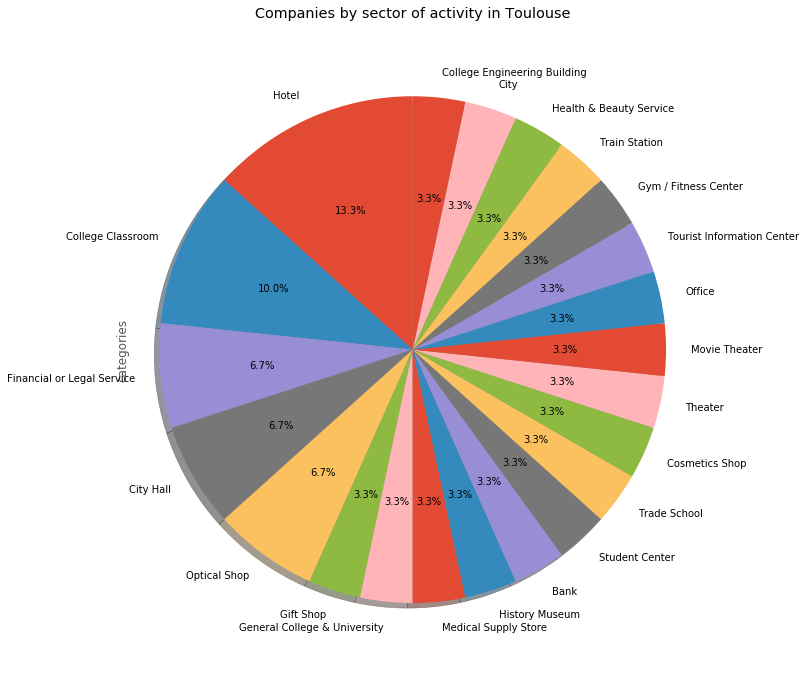

In [390]:
categories.plot(kind='pie',
                            figsize=(10, 12),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Companies by sector of activity in Toulouse')
plt.axis('equal') 

plt.show()

In [391]:
center_distance = dataframe_filtered['distance']

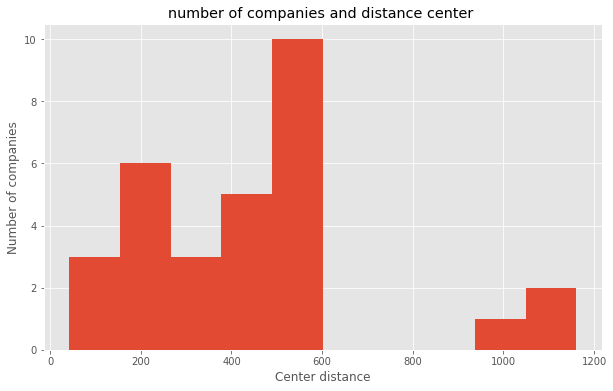

In [392]:
center_distance.plot(kind='hist', figsize=(10, 6))

plt.title('number of companies and distance center ')
plt.ylabel('Number of companies')
plt.xlabel('Center distance')

plt.show()

In [393]:
conda install -c anaconda xlrd

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\redge\anaconda3

  added / updated specs:
    - xlrd


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [394]:
pietons = pd.read_excel('comptages-pietons-1.xls')
pietons.columns

Index(['Geo Point', 'Geo Shape', 'adresse', 'transposÃ©e', 'comptage', 'annee',
       'jours', 'moment dans la journÃ©e'],
      dtype='object')

In [395]:
pietons.head()

,Geo Point,Geo Shape,adresse,transposÃ©e,comptage,annee,jours,moment dans la journÃ©e
0,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,semaine_soir_2008,778,2008.0,semaine,soir
1,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,semaine_journee_2015,514,2015.0,semaine,journee
2,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,samedi_soir_2015,921,2015.0,samedi,soir
3,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,samedi_journee_2014,1096,2014.0,samedi,journee
4,"43.6078255639,1.44587679059","{""type"": ""Point"", ""coordinates"": [1.4458767905...",devant la brasserie rue Bayard,samedi_journee_2012,826,2012.0,samedi,journee


In [396]:
pietons_clean = pietons.drop(['Geo Point', 'Geo Shape', 'transposÃ©e','moment dans la journÃ©e', 'jours', 'annee'], axis=1)

In [397]:
pietons_clean

,adresse,comptage
0,devant la brasserie rue Bayard,778
1,devant la brasserie rue Bayard,514
2,devant la brasserie rue Bayard,921
3,devant la brasserie rue Bayard,1096
4,devant la brasserie rue Bayard,826
...,...,...
8031,8 place Arnaud Bernard,0
8032,8 place Arnaud Bernard,296
8033,8 place Arnaud Bernard,0
8034,8 place Arnaud Bernard,0


In [398]:
pietons_clean.dtypes

adresse     object
comptage    object
dtype: object

In [399]:
pietons_clean['comptage'] = pietons_clean['comptage'].apply(pd.to_numeric, args=('coerce',))

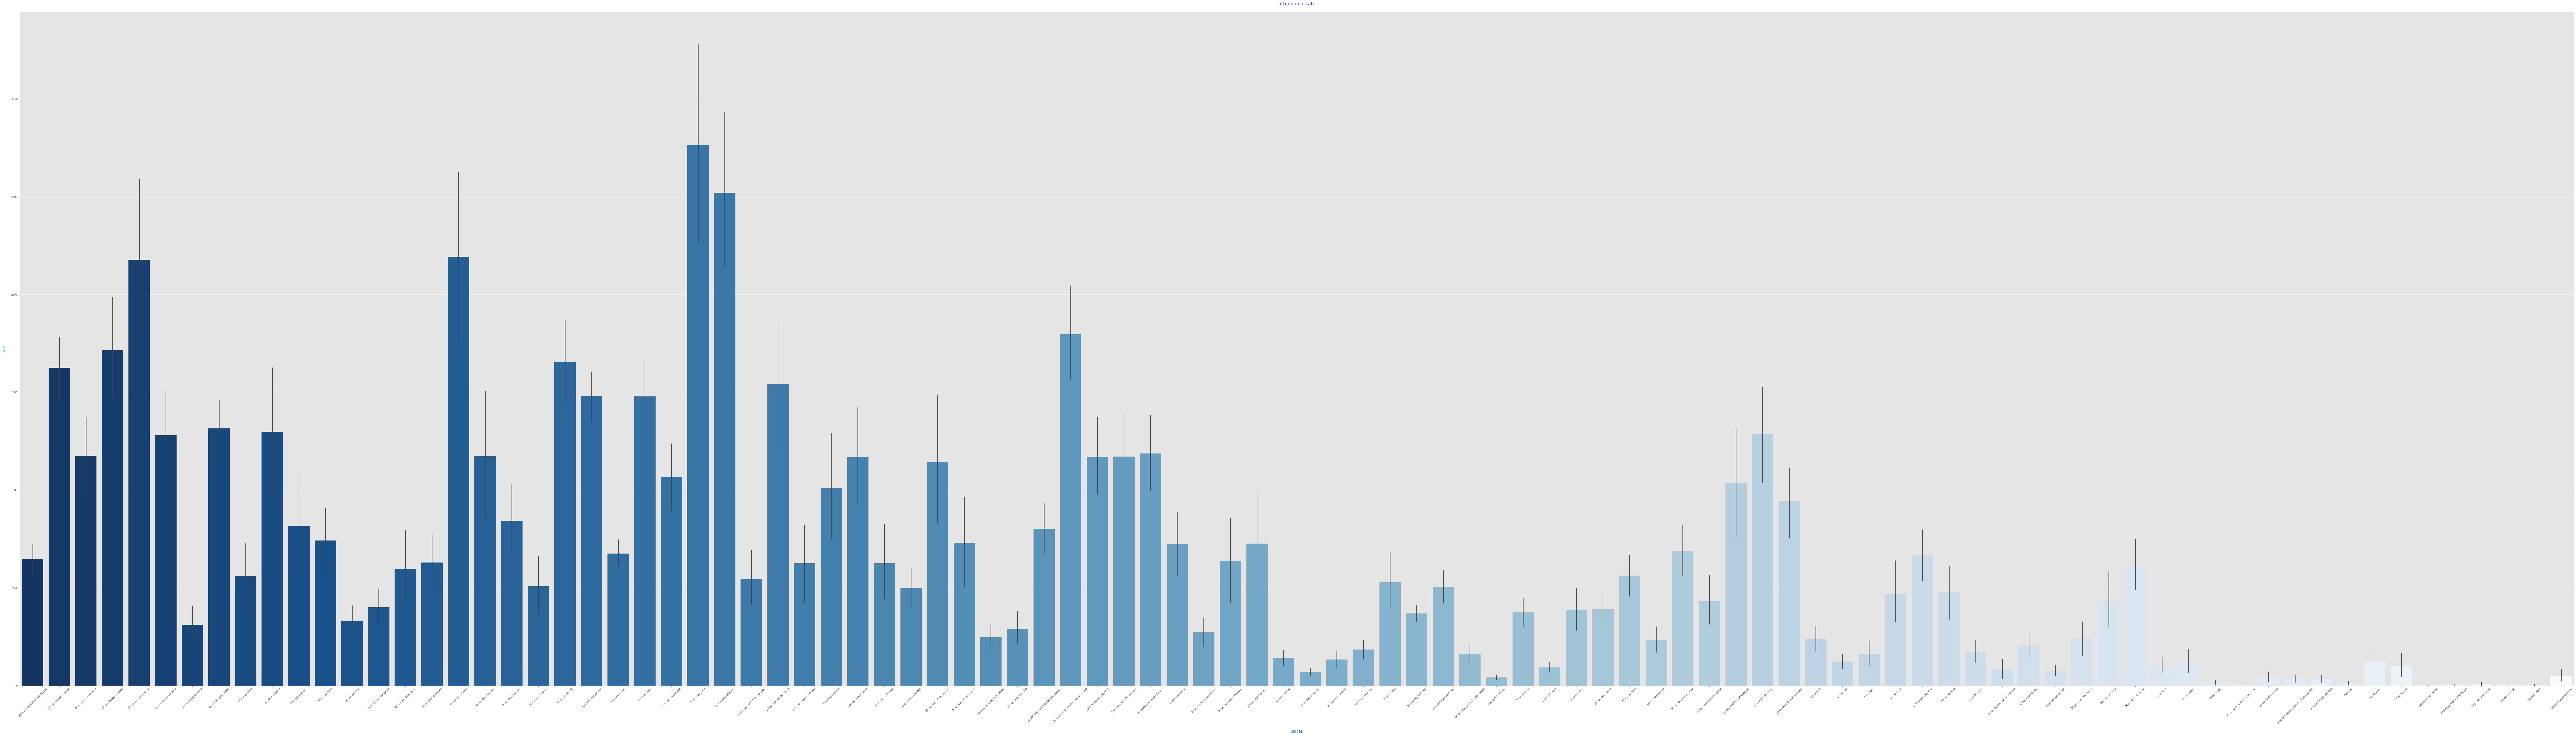

In [400]:
import seaborn as sns

plt.figure(figsize=(140,40))
sns.barplot(x=pietons_clean['adresse'], y=pietons_clean['comptage'], palette="Blues_r")
plt.xlabel('\nplaces', fontsize=15, color='#2980b9')
plt.ylabel('rate\n', fontsize=15, color='#2980b9')
plt.title("attendance rate\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

On peut voir ici que ce n'est pas très visuel, mais on peut se rendre compte que certains éléments sortent quand même du lot. 
Nous allons trier encore plus le jeu de données pour n'afficher que les valeurs les plus importantes. 

In [401]:
pietons_clean = pietons_clean.sort_values(by = 'comptage', ascending = False)

In [402]:
pietons_clean = pietons_clean.head(10)
pietons_clean

,adresse,comptage
2019,5 rue Lafayette,11445.0
3606,5 rue Lafayette,11093.0
5105,48 rue Saint Rome,8962.0
413,5 rue Lafayette,8681.0
3610,5 rue Lafayette,8385.0
3231,45 rue Alsace Lorraine,7304.0
2025,5 rue Lafayette,7299.0
86,45 rue Alsace Lorraine,7280.0
1885,48 rue Saint Rome,7222.0
7068,14 AllÃ©es du PrÃ©sident Roosevelt,6994.0


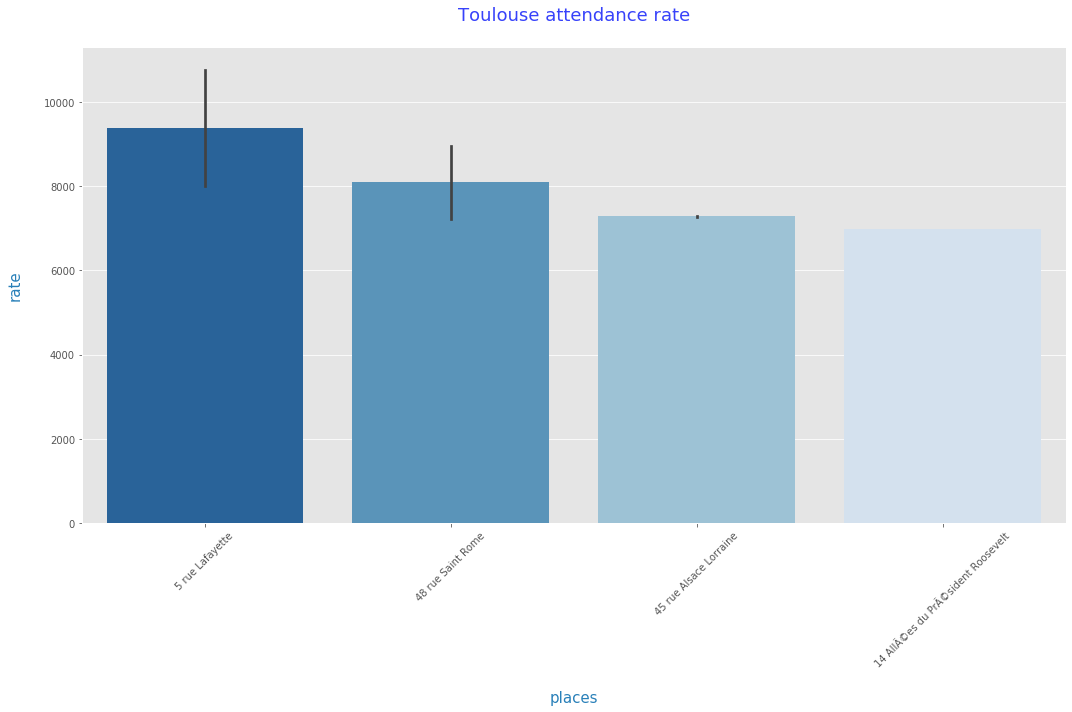

In [403]:
plt.figure(figsize=(15,10))
sns.barplot(x=pietons_clean['adresse'], y=pietons_clean['comptage'], palette="Blues_r")
plt.xlabel('\nplaces', fontsize=15, color='#2980b9')
plt.ylabel('rate\n', fontsize=15, color='#2980b9')
plt.title("Toulouse attendance rate\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()

On peut voir ici que le quartier de toulouse ayant le plus de fréquentation est "Rue Lafayette", seconde place pour "Saint Rome" et enfin on trouve "Alsace Lorraine". Il serait intéressant de comparer nos données, dans le but de trouver une possible corrélation entre le taux de fréquentation et la localisation des entreprises.

Partie analyse des companies, impact de la localisation sur les likes: 


Régréssion linéaire : 

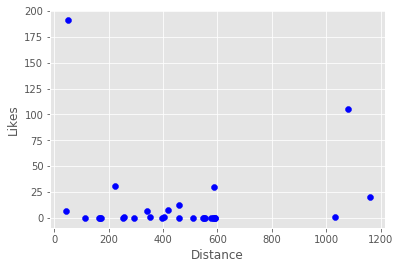

In [499]:
plt.scatter(dataframe_filtered.distance, dataframe_filtered.likes,  color='blue')
plt.xlabel("Distance")
plt.ylabel("Likes")
plt.show()

In [500]:
train_data = dataframe_filtered[['distance','likes']]
train_data = train_data.astype('float64')

In [501]:
msk = np.random.rand(len(train_data)) < 0.8
train = train_data[msk]
test = train_data[~msk]

Look the train data distribution : 

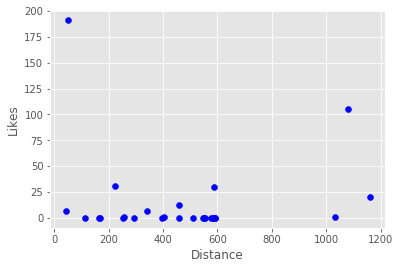

In [503]:
plt.scatter(train.distance, train.likes,  color='blue')
plt.xlabel("Distance")
plt.ylabel("Likes")
plt.show()

In [504]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['distance']])
train_y = np.asanyarray(train[['likes']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00392889]]
Intercept:  [16.8686292]


Text(0, 0.5, 'likes')

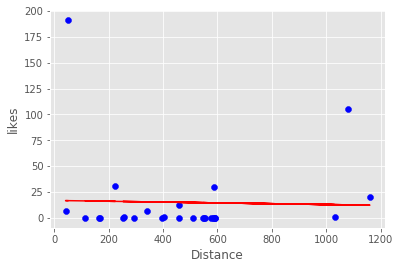

In [505]:
plt.scatter(train.distance, train.likes,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Distance")
plt.ylabel("likes")

On peut constater que les likes stagnent malgré l'augementation de la distance. Le modèle ne s'applique donc pas bien, la régression linéaire n'est pas très efficace. Nous allons tenter une autre approche pour voir si il est possible de faire resortir d'autres éléments. On peut voir que les distances courte ont plus de likes, plus on l'éloigne, moins il y a de likes pour les établissements. Je vais tenter d'appliquer le Knearest pour voir si une méthode de "voisin les plus proches" serait bénéfique.

In [506]:
X = train_data[['distance']] .values
X[0:5]

array([[ 50.],
       [ 42.],
       [225.],
       [115.],
       [164.]])

In [507]:
y = train_data['likes'].values
y[0:5]

array([191.,   7.,  31.,   0.,   0.])

In [508]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 1) (24,)
Test set: (6, 1) (6,)


In [509]:
from sklearn.neighbors import KNeighborsClassifier

In [510]:
k = 2

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [511]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([ 0.,  0.,  0.,  0., 20.])

In [512]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6666666666666666
Test set Accuracy:  0.5


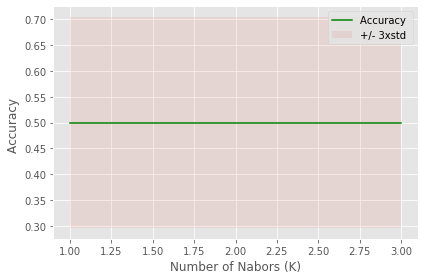

The best accuracy was with 0.5 with k= 1


In [513]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Knearest vérifie l'impact d'une variable sur les voisins les plus proches. Après avoir vérifié l'influence inter-voisins sur les likes et la distance, nous trouve que K=1. Le score est de 0.5 ce qui veut dire que nous avons 50% de lien avec notre variable. Difficile donc de conclure sur l'impact de la distance sur les likes. On va donc tenter une dernière approche, de clustering

Nous allons maintenant déterminer des trois secteurs d'activité les plus importants avec un clustering Knearest. On pourra donc déterminer, outre une visualisation, via algorithme, quelle valeur sort du lot.

In [539]:
from sklearn.preprocessing import StandardScaler
X = train_data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 3 0 0 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0]


In [540]:
train_data["Cluster"] = labels
train_data.head(10)

,distance,likes,Cluster
0,50.0,191.0,1
1,42.0,7.0,0
2,225.0,31.0,3
3,115.0,0.0,0
4,164.0,0.0,0
5,168.0,0.0,0
6,171.0,0.0,0
7,1082.0,105.0,2
8,253.0,0.0,0
9,258.0,1.0,0


In [542]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

NameError: name 'y_kmeans' is not defined